# Cluster de usuarios por dominio

## Librerias

In [2]:
from matplotlib import pyplot as plt
import pandas as pd

## Carga de tablas

In [3]:
#Una muestra de la tabla se encuentra en /data
trafico = pd.read_json("/data/transacciones.json")

## Graficando la informacion

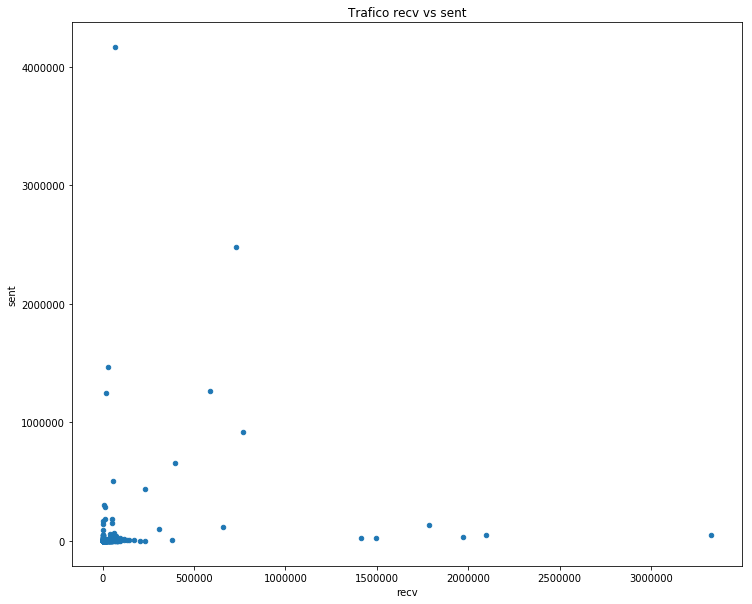

In [4]:
trafico.plot.scatter(x="recv",y="sent",figsize=(12,10))
plt.title('Trafico recv vs sent')
plt.show()

## Haciendole un corte a la informacion

In [5]:
 trafico[(trafico['recv'] > 3000000 )|(trafico['sent'] > 2500000)]

,activeTime,application,destination,flows,numClients,port,protocol,recv,sent
1,27060,Miscellaneous web,10.22.251.136,8921,1,80,TCP,70242,4165367
162,23880,Software updates,b1.download.windowsupdate.com,2825,2,80,TCP,3329040,52411


In [6]:
trafico_sn_outlayers = trafico[(trafico['recv'] <= 3000000 )&(trafico['sent'] <= 2500000)]

### Graficando primer paso sin outlayers

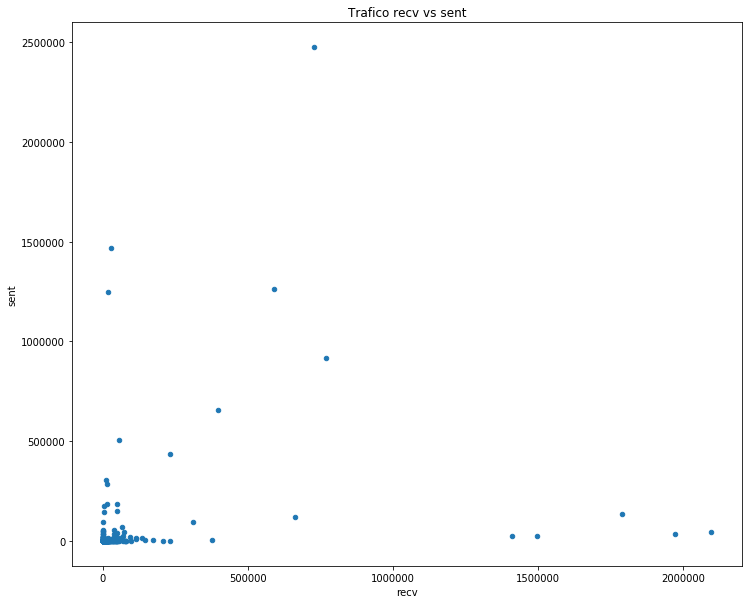

In [7]:
trafico_sn_outlayers.plot.scatter(x="recv",y="sent",figsize=(12,10))
plt.title('Trafico recv vs sent')
plt.show()

## K clustering para categorizar

In [8]:
from sklearn.cluster import KMeans
# Number of clusters
kmeans = KMeans(n_clusters=3)
# Fitting the input data
kmeans = kmeans.fit(trafico_sn_outlayers[['recv','sent']])
# Getting the cluster labels
labels = kmeans.predict(trafico_sn_outlayers[['recv','sent']])
# Centroid values
centroids = kmeans.cluster_centers_
trafico_sn_outlayers['color']= labels

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


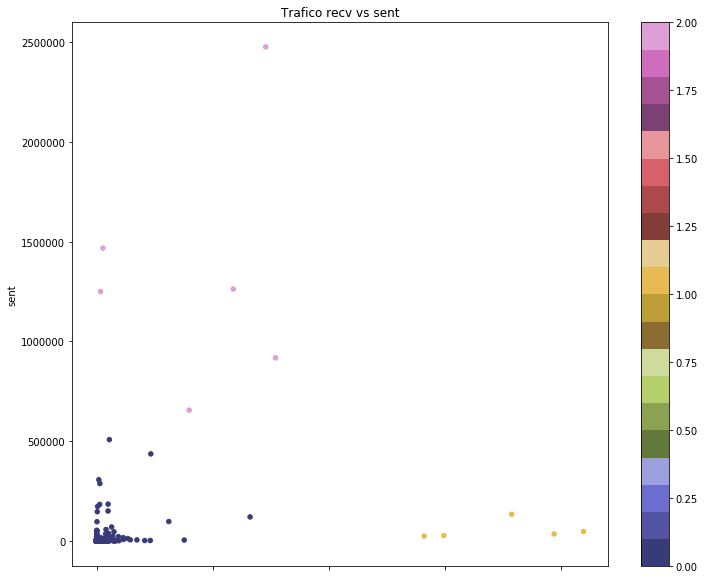

In [9]:

cm = plt.cm.get_cmap('tab20b')
trafico_sn_outlayers.plot.scatter(x="recv",y="sent",figsize=(12,10),c=labels,cmap = cm)
plt.title('Trafico recv vs sent')
plt.show()

In [10]:
trafico_sn_outlayers[trafico_sn_outlayers['color']  == 1 ]

,activeTime,application,destination,flows,numClients,port,protocol,recv,sent,color
19,540,Miscellaneous web,fota-s3-dn.ospserver.net,2,1,80,TCP,1411107,24807,1
187,53760,YouTube,None,4519,82,-,-,2097333,47731,1
190,58920,iTunes,None,1954,226,-,-,1970824,35712,1
197,242820,Facebook,None,13017,430,-,-,1788231,134288,1
198,54840,microsoft.com,None,2010,42,-,-,1495576,27822,1


In [11]:
trafico_sn_outlayers[trafico_sn_outlayers['color']  == 2 ]

,activeTime,application,destination,flows,numClients,port,protocol,recv,sent,color
2,26460,Miscellaneous web,10.22.251.139,7630,1,80,TCP,27657,1467302,2
3,26040,Miscellaneous web,10.22.251.155,5381,1,80,TCP,17135,1249201,2
45,27360,Miscellaneous secure web,10.22.251.136,32175,1,443,TCP,588824,1262147,2
46,26940,Miscellaneous secure web,10.22.251.139,46717,1,443,TCP,728438,2474721,2
191,288540,apple.com,None,11534,423,-,-,770963,917579,2
208,90360,Google HTTPS,None,33933,4,-,-,399138,655762,2


## Graficando secci'on de interes

In [12]:
trafico_filtrado = trafico_sn_outlayers[trafico_sn_outlayers['color']  == 0 ]

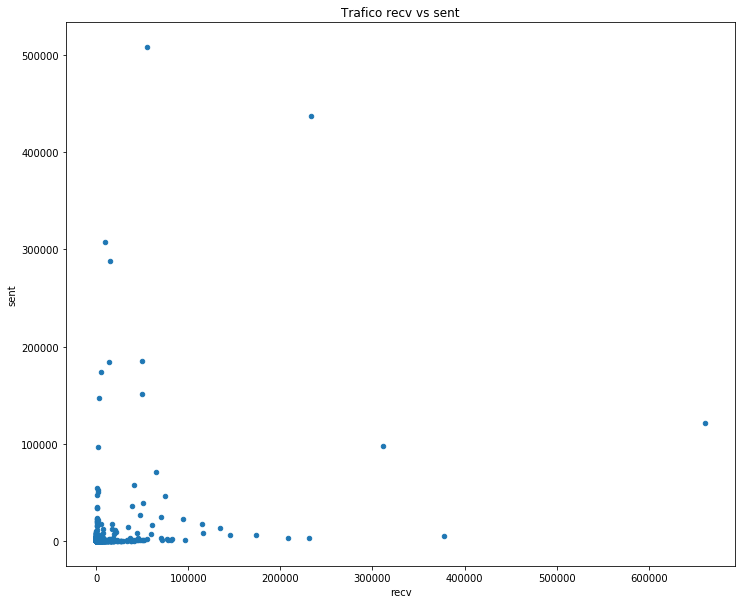

In [13]:
trafico_filtrado.plot.scatter(x="recv",y="sent",figsize=(12,10))
plt.title('Trafico recv vs sent')
plt.show()

In [14]:
trafico_filtrado[trafico_filtrado['recv']  >= 200000 ]

,activeTime,application,destination,flows,numClients,port,protocol,recv,sent,color
18,4260,Miscellaneous web,download.mcafee.com,40,1,80,TCP,377548,5106,0
100,61800,Miscellaneous secure web,mmg-fna.whatsapp.net,912,269,443,TCP,661222,121021,0
150,20880,UDP,10.22.251.136,1901,1,443,UDP,311295,97879,0
151,21540,UDP,10.22.251.139,2588,1,443,UDP,233680,436548,0
161,8340,Software updates,au.download.windowsupdate.com,404,3,80,TCP,231282,2915,0
491,540,Miscellaneous secure web,adaptive-streaming.udemy.com,9,1,443,TCP,207748,2735,0


In [15]:
trafico_filtrado[trafico_filtrado['sent']  >= 100000 ]

,activeTime,application,destination,flows,numClients,port,protocol,recv,sent,color
0,10320,Miscellaneous web,10.22.242.213,1104,1,80,TCP,3024,147051,0
12,9600,Miscellaneous web,b1.download.windowsupdate.com,379,3,80,TCP,14502,288168,0
44,19680,Miscellaneous secure web,10.22.242.213,7067,1,443,TCP,49721,185220,0
47,26820,Miscellaneous secure web,10.22.251.155,16105,1,443,TCP,55111,507959,0
100,61800,Miscellaneous secure web,mmg-fna.whatsapp.net,912,269,443,TCP,661222,121021,0
151,21540,UDP,10.22.251.139,2588,1,443,UDP,233680,436548,0
152,13680,UDP,10.22.251.155,1256,1,443,UDP,49560,150682,0
159,52500,Meraki HTTPS,None,2869,2,-,-,13528,183919,0
1404,3540,UDP,play.googleapis.com,60,32,443,UDP,4730,173424,0
1426,11400,UDP,www.googleapis.com,209,73,443,UDP,9956,307236,0


In [16]:
trafico_small = trafico_filtrado[(trafico_filtrado['recv'] <= 200000 )&(trafico_filtrado['sent'] <= 100000)]

In [17]:
trafico_small

,activeTime,application,destination,flows,numClients,port,protocol,recv,sent,color
4,660,Miscellaneous web,189.194.232.194,18,1,80,TCP,33475,377,0
5,900,Miscellaneous web,189.198.130.25,35,1,80,TCP,41234,480,0
6,60,Miscellaneous web,201.174.231.74,2,1,80,TCP,1178,15,0
7,120,Miscellaneous web,67.24.193.254,3,1,80,TCP,2492,19,0
8,540,Miscellaneous web,8.248.65.254,18,1,80,TCP,4775,70,0
9,120,Miscellaneous web,akamai.net,25,2,80,TCP,54967,1720,0
10,60,Miscellaneous web,appldnld.g.aaplimg.com,2,1,80,TCP,871,19,0
11,60,Miscellaneous web,au.download.windowsupdate.com,1,1,80,TCP,59,3469,0
13,480,Miscellaneous web,bigota.d.miui.com,6,1,80,TCP,44640,845,0
14,60,Miscellaneous web,captive.apple.com,1,1,80,TCP,70990,852,0


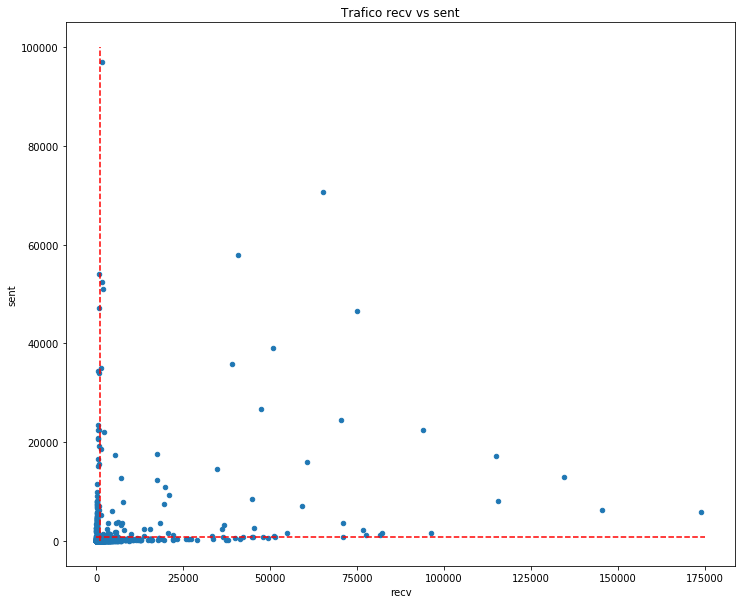

In [31]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines


    
trafico_small.plot.scatter(x="recv",y="sent",figsize=(12,10))
plt.plot([0,175000], [800,800], "r--")
plt.plot([1100,1100], [0,100000], "r--")

plt.title('Trafico recv vs sent')
plt.show()

In [27]:
trafico_new

,activeTime,application,destination,flows,numClients,port,protocol,recv,sent,color
4,660,Miscellaneous web,189.194.232.194,18,1,80,TCP,33475,377,0
5,900,Miscellaneous web,189.198.130.25,35,1,80,TCP,41234,480,0
6,60,Miscellaneous web,201.174.231.74,2,1,80,TCP,1178,15,0
7,120,Miscellaneous web,67.24.193.254,3,1,80,TCP,2492,19,0
8,540,Miscellaneous web,8.248.65.254,18,1,80,TCP,4775,70,0
10,60,Miscellaneous web,appldnld.g.aaplimg.com,2,1,80,TCP,871,19,0
15,60,Miscellaneous web,cdn.appexnw.com,1,1,80,TCP,22137,169,0
16,240,Miscellaneous web,clientconfig.akamai.steamstatic.com,53,1,80,TCP,25722,332,0
20,60,Miscellaneous web,fp-vp.azureedge.net,9,1,80,TCP,1906,23,0
21,60,Miscellaneous web,iecvlist.microsoft.com,1,1,80,TCP,846,12,0


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


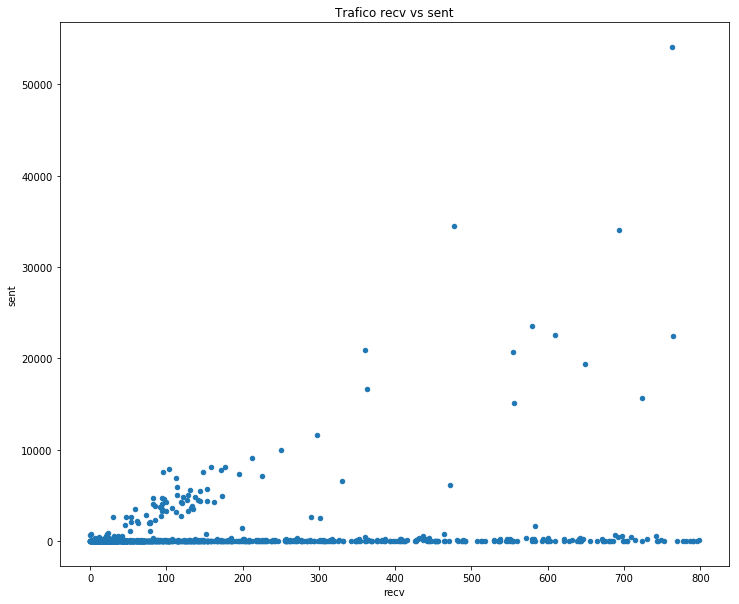

In [33]:
trafico_new_b = trafico_small[(trafico_filtrado['recv'] <= 1000 )]
trafico_new_b.plot.scatter(x="recv",y="sent",figsize=(12,10))
plt.title('Trafico recv vs sent')
plt.show()

In [34]:
trafico_new_b

,activeTime,application,destination,flows,numClients,port,protocol,recv,sent,color
11,60,Miscellaneous web,au.download.windowsupdate.com,1,1,80,TCP,59,3469,0
28,300,Miscellaneous web,itunes.apple.com,5,1,80,TCP,763,54074,0
43,120,Miscellaneous secure web,*.tvcdn.de,1,1,443,TCP,693,34069,0
52,120,Miscellaneous secure web,blobstore-apple.com.akadns.net,1,1,443,TCP,47,2650,0
57,540,Miscellaneous secure web,cl1.apple.com,9,1,443,TCP,360,20861,0
58,540,Miscellaneous secure web,cl2.apple.com,8,1,443,TCP,555,20744,0
62,120,Miscellaneous secure web,crashlogs.whatsapp.net,2,2,443,TCP,54,2064,0
68,60,Miscellaneous secure web,file-us-10-246-65-152.file.samsungcloud.com,1,1,443,TCP,144,5510,0
69,60,Miscellaneous secure web,file-us-10-246-72-13.file.samsungcloud.com,2,1,443,TCP,212,9141,0
71,120,Miscellaneous secure web,file-us-10-246-72-224.file.samsungcloud.com,1,1,443,TCP,177,8141,0


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


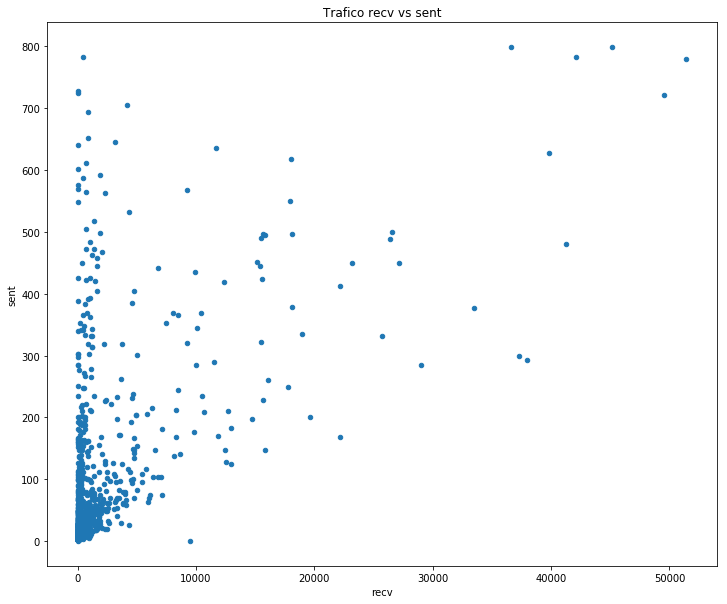

In [26]:
trafico_new = trafico_small[(trafico_filtrado['sent'] <= 800 )]
trafico_new.plot.scatter(x="recv",y="sent",figsize=(12,10))
plt.title('Trafico recv vs sent')
plt.show()
